In [1]:
from geopy.geocoders import Nominatim
import requests

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    # Get the forecast office and grid information
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    # Extract the forecast URLs
    forecast_url = data['properties']['forecast']
    hourly_forecast_url = data['properties']['forecastHourly']
    
    # Get the forecast data
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    # Get hourly forecast for additional data (e.g., humidity, precipitation)
    hourly_forecast_response = requests.get(hourly_forecast_url, headers=headers)
    hourly_forecast_response.raise_for_status()
    hourly_forecast_data = hourly_forecast_response.json()
    
    return forecast_data, hourly_forecast_data

def extract_detailed_weather(forecast_data, hourly_forecast_data):
    """Extract detailed weather data from NOAA's forecast."""
    weather_details = []

    # Daily forecast details
    for daily_period in forecast_data['properties']['periods']:
        details = {
            "name": daily_period['name'],
            "start_time": daily_period['startTime'],
            "end_time": daily_period['endTime'],
            "temperature": f"{daily_period['temperature']}°{daily_period['temperatureUnit']}",
            "wind_speed": daily_period['windSpeed'],
            "wind_direction": daily_period['windDirection'],
            "forecast": daily_period['shortForecast']
        }
        weather_details.append(details)
    
    # Add extra details from the hourly data (e.g., humidity, precipitation)
    for i, hourly_period in enumerate(hourly_forecast_data['properties']['periods'][:len(weather_details)]):
        humidity = hourly_period.get('relativeHumidity', {}).get('value', 'N/A')
        precipitation = hourly_period.get('probabilityOfPrecipitation', {}).get('value', 'N/A')
        weather_details[i]["humidity"] = f"{humidity}%" if humidity != 'N/A' else "N/A"
        weather_details[i]["precipitation"] = f"{precipitation}%" if precipitation != 'N/A' else "N/A"
    
    return weather_details

def main():
    """Main function to get weather data for a user-specified location."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data, hourly_forecast_data = get_weather_data(latitude, longitude)
        
        # Extract and display detailed weather data
        weather_details = extract_detailed_weather(forecast_data, hourly_forecast_data)
        print(f"Weather data for {city}, {state}:")
        for detail in weather_details:
            print(f"\n{detail['name']}:")
            print(f"  Start Time: {detail['start_time']}")
            print(f"  End Time: {detail['end_time']}")
            print(f"  Temperature: {detail['temperature']}")
            print(f"  Wind Speed: {detail['wind_speed']} ({detail['wind_direction']})")
            print(f"  Forecast: {detail['forecast']}")
            print(f"  Humidity: {detail['humidity']}")
            print(f"  Precipitation: {detail['precipitation']}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Huntington
Enter state:  WV


Geolocation of Huntington, WV: (38.4192496, -82.445154)
Weather data for Huntington, WV:

Tonight:
  Start Time: 2024-12-11T22:00:00-05:00
  End Time: 2024-12-12T06:00:00-05:00
  Temperature: 25°F
  Wind Speed: 10 mph (W)
  Forecast: Chance Snow Showers
  Humidity: 80%
  Precipitation: 21%

Thursday:
  Start Time: 2024-12-12T06:00:00-05:00
  End Time: 2024-12-12T18:00:00-05:00
  Temperature: 38°F
  Wind Speed: 6 to 10 mph (W)
  Forecast: Sunny
  Humidity: 78%
  Precipitation: 19%

Thursday Night:
  Start Time: 2024-12-12T18:00:00-05:00
  End Time: 2024-12-13T06:00:00-05:00
  Temperature: 25°F
  Wind Speed: 0 to 3 mph (S)
  Forecast: Partly Cloudy
  Humidity: 76%
  Precipitation: 16%

Friday:
  Start Time: 2024-12-13T06:00:00-05:00
  End Time: 2024-12-13T18:00:00-05:00
  Temperature: 46°F
  Wind Speed: 2 mph (E)
  Forecast: Partly Sunny
  Humidity: 73%
  Precipitation: 14%

Friday Night:
  Start Time: 2024-12-13T18:00:00-05:00
  End Time: 2024-12-14T06:00:00-05:00
  Temperature: 28°F
  

In [5]:
pip install cartopy 

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 23.0 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 27.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Enter city:  Huntington
Enter state:  WV


Geolocation of Huntington, WV: (38.4192496, -82.445154)
Retrieved weather data for Huntington, WV.


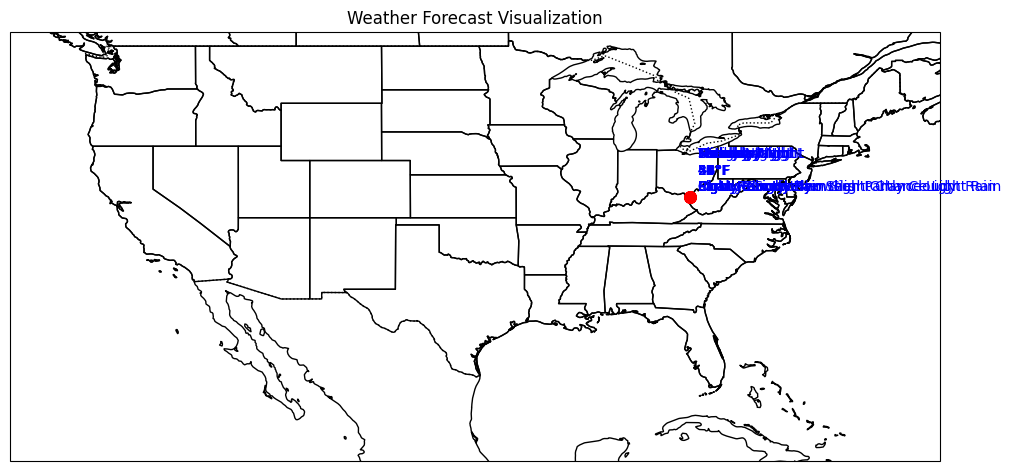

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    # Get the forecast office and grid information
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    # Extract the forecast URL
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_coordinates(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'start_time': period['startTime']
        })
    return forecasts

def plot_weather_on_map(forecasts):
    """Plot weather data on a map using Cartopy."""
    # Set up the map
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot each forecast as a point on the map
    for forecast in forecasts:
        ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
        ax.text(
            forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
            f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
            transform=ccrs.PlateCarree(),
            fontsize=10,
            color='blue'
        )
    
    # Title and display the map
    plt.title("Weather Forecast Visualization")
    plt.show()

def main():
    """Main function to get weather data for a user-specified location and plot it."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_coordinates(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Plot weather data on a map
        plot_weather_on_map(forecasts)
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Beckley
Enter state:  WV


Geolocation of Beckley, WV: (37.7781702, -81.1881557)
Retrieved weather data for Beckley, WV.


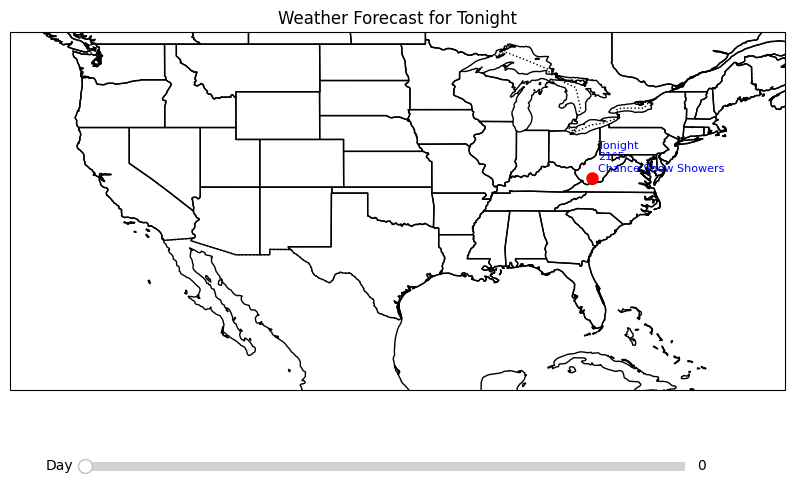

In [3]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_coordinates(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'start_time': period['startTime']
        })
    return forecasts

def plot_forecast_map(ax, forecast):
    """Plot a single forecast on the map."""
    ax.clear()
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the forecast
    ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(
        forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
        f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='blue'
    )
    ax.set_title(f"Weather Forecast for {forecast['name']}")

def main():
    """Main function to get weather data for a user-specified location and create interactive map."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_coordinates(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Interactive map setup
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
        plt.subplots_adjust(bottom=0.2)  # Space for slider

        # Initial plot
        current_index = 0
        plot_forecast_map(ax, forecasts[current_index])

        # Add slider
        ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of slider
        slider = Slider(ax_slider, 'Day', 0, len(forecasts) - 1, valinit=0, valstep=1)

        # Update function for slider
        def update(val):
            index = int(slider.val)
            plot_forecast_map(ax, forecasts[index])
            fig.canvas.draw_idle()

        slider.on_changed(update)
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Beckley
Enter state:  WV


Geolocation of Beckley, WV: (37.7781702, -81.1881557)
Retrieved weather data for Beckley, WV.


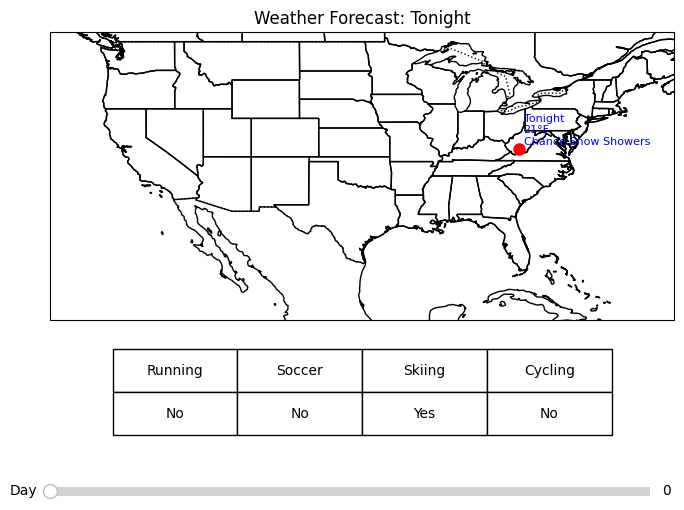

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests
import pandas as pd

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_data(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'wind_speed': period['windSpeed'],
            'start_time': period['startTime']
        })
    return forecasts

def assess_sports_suitability(forecast):
    """Assess sports suitability based on weather conditions."""
    temperature = forecast['temperature']
    wind_speed = int(forecast['wind_speed'].split()[0]) if forecast['wind_speed'] else 0
    short_forecast = forecast['forecast'].lower()
    
    sports = {
        "Running": 50 <= temperature <= 70 and wind_speed <= 15 and "rain" not in short_forecast,
        "Soccer": temperature >= 40 and wind_speed <= 20 and "rain" not in short_forecast,
        "Skiing": temperature <= 32 and "snow" in short_forecast,
        "Cycling": 50 <= temperature <= 80 and wind_speed <= 15 and "rain" not in short_forecast,
    }
    
    return {sport: "Yes" if suitable else "No" for sport, suitable in sports.items()}

def plot_forecast_with_sports(ax, forecast, sports_table):
    """Plot forecast and sports suitability on the map."""
    ax.clear()
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the forecast
    ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(
        forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
        f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='blue'
    )
    ax.set_title(f"Weather Forecast: {forecast['name']}")

    # Display sports suitability table
    ax.table(
        cellText=sports_table.values,
        colLabels=sports_table.columns,
        loc='bottom',
        cellLoc='center',
        bbox=[0.1, -0.4, 0.8, 0.3]
    )

def main():
    """Main function to get weather data for a user-specified location and create interactive map."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_data(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Interactive map setup
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
        plt.subplots_adjust(bottom=0.4)  # Space for slider and table

        # Initial plot
        current_index = 0
        current_sports = assess_sports_suitability(forecasts[current_index])
        sports_table = pd.DataFrame([current_sports])
        plot_forecast_with_sports(ax, forecasts[current_index], sports_table)

        # Add slider
        ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of slider
        slider = Slider(ax_slider, 'Day', 0, len(forecasts) - 1, valinit=0, valstep=1)

        # Update function for slider
        def update(val):
            index = int(slider.val)
            updated_sports = assess_sports_suitability(forecasts[index])
            updated_table = pd.DataFrame([updated_sports])
            plot_forecast_with_sports(ax, forecasts[index], updated_table)
            fig.canvas.draw_idle()

        slider.on_changed(update)
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation of Morgantown, WV: (39.6296809, -79.9559437)
Retrieved weather data for Morgantown, WV.


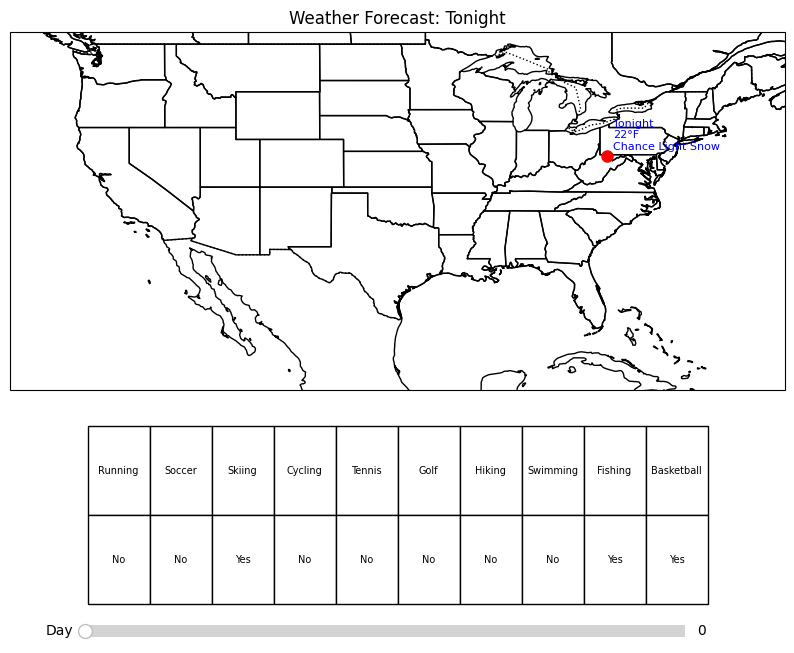

In [7]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests
import pandas as pd

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_data(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'wind_speed': period['windSpeed'],
            'start_time': period['startTime']
        })
    return forecasts

def assess_sports_suitability(forecast):
    """Assess suitability for 10 sports based on weather conditions."""
    temperature = forecast['temperature']
    wind_speed = int(forecast['wind_speed'].split()[0]) if forecast['wind_speed'] else 0
    short_forecast = forecast['forecast'].lower()
    
    sports = {
        "Running": 50 <= temperature <= 70 and wind_speed <= 15 and "rain" not in short_forecast,
        "Soccer": temperature >= 40 and wind_speed <= 20 and "rain" not in short_forecast,
        "Skiing": temperature <= 32 and "snow" in short_forecast,
        "Cycling": 50 <= temperature <= 80 and wind_speed <= 15 and "rain" not in short_forecast,
        "Tennis": 50 <= temperature <= 90 and wind_speed <= 15 and "rain" not in short_forecast,
        "Golf": 50 <= temperature <= 80 and wind_speed <= 20,
        "Hiking": 50 <= temperature <= 80 and wind_speed <= 15 and "rain" not in short_forecast,
        "Swimming": temperature > 70 and "rain" not in short_forecast,
        "Fishing": wind_speed <= 15,  # Any temperature is fine for fishing
        "Basketball": wind_speed <= 20 and "rain" not in short_forecast,  # Can be indoors if needed
    }
    
    return {sport: "Yes" if suitable else "No" for sport, suitable in sports.items()}

def plot_forecast_with_sports(ax, forecast, sports_table):
    """Plot forecast and sports suitability on the map."""
    ax.clear()
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the forecast
    ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(
        forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
        f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='blue'
    )
    ax.set_title(f"Weather Forecast: {forecast['name']}")

    # Display sports suitability table
    ax.table(
        cellText=sports_table.values,
        colLabels=sports_table.columns,
        loc='bottom',
        cellLoc='center',
        bbox=[0.1, -0.6, 0.8, 0.5]
    )

def main():
    """Main function to get weather data for a user-specified location and create interactive map."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_data(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Interactive map setup
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
        plt.subplots_adjust(bottom=0.4)  # Space for slider and table

        # Initial plot
        current_index = 0
        current_sports = assess_sports_suitability(forecasts[current_index])
        sports_table = pd.DataFrame([current_sports])
        plot_forecast_with_sports(ax, forecasts[current_index], sports_table)

        # Add slider
        ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of slider
        slider = Slider(ax_slider, 'Day', 0, len(forecasts) - 1, valinit=0, valstep=1)

        # Update function for slider
        def update(val):
            index = int(slider.val)
            updated_sports = assess_sports_suitability(forecasts[index])
            updated_table = pd.DataFrame([updated_sports])
            plot_forecast_with_sports(ax, forecasts[index], updated_table)
            fig.canvas.draw_idle()

        slider.on_changed(update)
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


In [ ]:
Sport	Weather Conditions
Running	50°F–70°F, low wind, no rain
Soccer	>40°F, moderate wind, no rain
Skiing	<=32°F, snow required
Cycling	50°F–80°F, low wind, no rain
Tennis	50°F–90°F, low wind, no rain
Golf	50°F–80°F, low wind
Hiking	50°F–80°F, low wind, no rain
Swimming	>70°F, no rain
Fishing	Any temperature, low wind
Basketball	Any temperature, low wind, no heavy rain (can also be played indoors in most conditions)

In [8]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    hourly_url = data['properties']['forecastHourly']
    hourly_response = requests.get(hourly_url, headers=headers)
    hourly_response.raise_for_status()
    hourly_data = hourly_response.json()
    
    # Extract relevant data
    weather_records = []
    for period in hourly_data['properties']['periods']:
        record = {
            'start_time': period['startTime'],
            'temperature': period.get('temperature'),
            'wind_speed': int(period.get('windSpeed', "0 mph").split()[0]),
            'humidity': period.get('relativeHumidity', {}).get('value'),
            'precipitation': period.get('probabilityOfPrecipitation', {}).get('value'),
            'short_forecast': period.get('shortForecast')
        }
        weather_records.append(record)
    return pd.DataFrame(weather_records)

def engineer_features(weather_df):
    """Engineer features from weather data."""
    weather_df['comfort_index'] = (
        weather_df['temperature'] -
        0.7 * weather_df['humidity'].fillna(50) -
        0.5 * weather_df['precipitation'].fillna(0)
    )
    weather_df['is_rainy'] = weather_df['short_forecast'].str.contains("rain", case=False, na=False).astype(int)
    return weather_df

def train_ml_model(weather_df):
    """Train a simple ML model to predict the comfort index."""
    features = ['temperature', 'wind_speed', 'humidity', 'precipitation', 'is_rainy']
    target = 'comfort_index'
    
    X = weather_df[features].fillna(0)
    y = weather_df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, mse, r2, X_test, y_test, y_pred

def main():
    """Main function to execute the workflow."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Step 1: Geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Step 2: Fetch weather data
        weather_df = get_weather_data(latitude, longitude)
        print("Extracted Weather Data:")
        print(weather_df.head())
        
        # Step 3: Engineer features
        weather_df = engineer_features(weather_df)
        print("\nWeather Data with Engineered Features:")
        print(weather_df.head())
        
        # Step 4: Train ML model
        model, mse, r2, X_test, y_test, y_pred = train_ml_model(weather_df)
        print("\nML Model Metrics:")
        print(f"Mean Squared Error: {mse}")
        print(f"R² Score: {r2}")
        
        # Step 5: Display predictions
        print("\nSample Predictions:")
        predictions = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred
        }).reset_index(drop=True)
        print(predictions.head())
        
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation of Morgantown, WV: (39.6296809, -79.9559437)
Extracted Weather Data:
                  start_time  temperature  wind_speed  humidity  \
0  2024-12-11T23:00:00-05:00           30          10        79   
1  2024-12-12T00:00:00-05:00           30          12        80   
2  2024-12-12T01:00:00-05:00           30          13        80   
3  2024-12-12T02:00:00-05:00           30          14        77   
4  2024-12-12T03:00:00-05:00           28          15        75   

   precipitation            short_forecast  
0             15  Slight Chance Light Snow  
1             19  Slight Chance Light Snow  
2             27         Chance Light Snow  
3             34         Chance Light Snow  
4             26         Chance Light Snow  

Weather Data with Engineered Features:
                  start_time  temperature  wind_speed  humidity  \
0  2024-12-11T23:00:00-05:00           30          10        79   
1  2024-12-12T00:00:00-05:00           30          12        80   
2  20

In [11]:
from geopy.geocoders import Nominatim
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Get Geolocation
def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

# Step 2: Fetch Weather Data
def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {'User-Agent': 'YourAppName (your.email@example.com)'}
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    forecast_url = data['properties']['forecast']
    hourly_forecast_url = data['properties']['forecastHourly']
    
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()

    hourly_forecast_response = requests.get(hourly_forecast_url, headers=headers)
    hourly_forecast_response.raise_for_status()
    hourly_forecast_data = hourly_forecast_response.json()

    return forecast_data, hourly_forecast_data

# Step 3: Extract Weather Data
def extract_weather_details(forecast_data, hourly_forecast_data):
    """Extract 10 weather-related details for the week ahead."""
    weather_details = []

    for daily_period in forecast_data['properties']['periods']:
        details = {
            "name": daily_period['name'],
            "temperature": daily_period['temperature'],
            "wind_speed": int(daily_period['windSpeed'].split()[0]),
            "wind_direction": daily_period['windDirection'],
            "short_forecast": daily_period['shortForecast'],
            "humidity": None,  # Placeholder for hourly data
            "precipitation": None  # Placeholder for hourly data
        }
        weather_details.append(details)

    for i, hourly_period in enumerate(hourly_forecast_data['properties']['periods'][:len(weather_details)]):
        weather_details[i]["humidity"] = hourly_period.get('relativeHumidity', {}).get('value', 'N/A')
        weather_details[i]["precipitation"] = hourly_period.get('probabilityOfPrecipitation', {}).get('value', 'N/A')

    return weather_details

# Step 4: Recommend Sports
def recommend_sports(weather_details):
    """Recommend sports based on weather conditions."""
    sports_recommendations = []
    sports = {
        "Running": lambda temp, wind, prec: 50 <= temp <= 70 and wind <= 15 and prec <= 10,
        "Soccer": lambda temp, wind, prec: temp >= 40 and wind <= 20 and prec <= 20,
        "Skiing": lambda temp, wind, prec: temp <= 32 and prec <= 10,
        "Cycling": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 15 and prec <= 10,
        "Tennis": lambda temp, wind, prec: 50 <= temp <= 90 and wind <= 15 and prec <= 10,
        "Golf": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 20,
        "Hiking": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 15 and prec <= 20,
        "Swimming": lambda temp, wind, prec: temp > 70 and prec <= 20,
        "Fishing": lambda temp, wind, prec: wind <= 15 and prec <= 20,
        "Basketball": lambda temp, wind, prec: wind <= 20 and prec <= 20,
        "Baseball": lambda temp, wind, prec: temp > 50 and wind <= 20 and prec <= 20,
        "Climbing": lambda temp, wind, prec: temp > 40 and wind <= 15,
        "Rowing": lambda temp, wind, prec: temp > 50 and wind <= 10 and prec <= 10,
        "Surfing": lambda temp, wind, prec: temp > 70 and wind <= 15,
        "Paragliding": lambda temp, wind, prec: temp > 60 and wind <= 10
    }

    for day in weather_details:
        recommendations = {
            sport: "Yes" if criteria(day['temperature'], day['wind_speed'], day['precipitation']) else "No"
            for sport, criteria in sports.items()
        }
        sports_recommendations.append({"day": day['name'], "sports": recommendations})

    return sports_recommendations

# Step 5: Engineer Features
def engineer_features(weather_details):
    """Engineer features for ML usage."""
    df = pd.DataFrame(weather_details)
    df['comfort_index'] = df['temperature'] - 0.7 * df['humidity'] - 0.5 * df['precipitation']
    df['is_rainy'] = (df['precipitation'] > 10).astype(int)
    return df

# Step 6: Apply ML
def apply_ml(data):
    """Train a simple model to predict comfort index."""
    features = ['temperature', 'wind_speed', 'humidity', 'precipitation', 'is_rainy']
    target = 'comfort_index'
    
    X = data[features].fillna(0)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2, X_test, y_test, y_pred

# Main Function
def main():
    city = input("Enter city: ")
    state = input("Enter state: ")

    try:
        # Geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation: {latitude}, {longitude}")

        # Weather Data
        forecast_data, hourly_forecast_data = get_weather_data(latitude, longitude)
        weather_details = extract_weather_details(forecast_data, hourly_forecast_data)
        print("\nExtracted Weather Data:")
        for day in weather_details:
            print(day)

        # Sports Recommendations
        sports_recommendations = recommend_sports(weather_details)
        print("\nSports Recommendations:",sports_recommendations)
        #for rec in sports_recommendations:
        #    print(rec)

        # Feature Engineering
        engineered_data = engineer_features(weather_details)
        print("\nEngineered Features:")
        print(engineered_data.head())

        # ML Application
        model, mse, r2, X_test, y_test, y_pred = apply_ml(engineered_data)
        print("\nML Metrics:")
        print(f"Mean Squared Error: {mse}")
        print(f"R^2 Score: {r2}")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation: 39.6296809, -79.9559437

Extracted Weather Data:
{'name': 'Tonight', 'temperature': 22, 'wind_speed': 10, 'wind_direction': 'SW', 'short_forecast': 'Chance Light Snow', 'humidity': 79, 'precipitation': 15}
{'name': 'Thursday', 'temperature': 30, 'wind_speed': 8, 'wind_direction': 'W', 'short_forecast': 'Sunny', 'humidity': 80, 'precipitation': 19}
{'name': 'Thursday Night', 'temperature': 23, 'wind_speed': 1, 'wind_direction': 'W', 'short_forecast': 'Mostly Cloudy', 'humidity': 80, 'precipitation': 27}
{'name': 'Friday', 'temperature': 37, 'wind_speed': 2, 'wind_direction': 'NW', 'short_forecast': 'Partly Sunny', 'humidity': 77, 'precipitation': 34}
{'name': 'Friday Night', 'temperature': 23, 'wind_speed': 2, 'wind_direction': 'NE', 'short_forecast': 'Partly Cloudy', 'humidity': 75, 'precipitation': 26}
{'name': 'Saturday', 'temperature': 48, 'wind_speed': 1, 'wind_direction': 'E', 'short_forecast': 'Mostly Sunny', 'humidity': 73, 'precipitation': 17}
{'name': 'Saturday Ni

In [10]:
from geopy.geocoders import Nominatim
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import psycopg2

# Step 1: Get Geolocation
def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

# Step 2: Fetch Weather Data
def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {'User-Agent': 'YourAppName (your.email@example.com)'}
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    forecast_url = data['properties']['forecast']
    hourly_forecast_url = data['properties']['forecastHourly']
    
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()

    hourly_forecast_response = requests.get(hourly_forecast_url, headers=headers)
    hourly_forecast_response.raise_for_status()
    hourly_forecast_data = hourly_forecast_response.json()

    return forecast_data, hourly_forecast_data

# Step 3: Extract Weather Data
def extract_weather_details(forecast_data, hourly_forecast_data):
    """Extract 10 weather-related details for the week ahead."""
    weather_details = []

    for daily_period in forecast_data['properties']['periods']:
        details = {
            "name": daily_period['name'],
            "temperature": daily_period['temperature'],
            "wind_speed": int(daily_period['windSpeed'].split()[0]),
            "wind_direction": daily_period['windDirection'],
            "short_forecast": daily_period['shortForecast'],
            "humidity": None,  # Placeholder for hourly data
            "precipitation": None  # Placeholder for hourly data
        }
        weather_details.append(details)

    for i, hourly_period in enumerate(hourly_forecast_data['properties']['periods'][:len(weather_details)]):
        weather_details[i]["humidity"] = hourly_period.get('relativeHumidity', {}).get('value', 'N/A')
        weather_details[i]["precipitation"] = hourly_period.get('probabilityOfPrecipitation', {}).get('value', 'N/A')

    return weather_details

# Step 4: Recommend Sports
def recommend_sports(weather_details):
    """Recommend sports based on weather conditions."""
    sports_recommendations = []
    sports = {
        "Running": lambda temp, wind, prec: 50 <= temp <= 70 and wind <= 15 and prec <= 10,
        "Soccer": lambda temp, wind, prec: temp >= 40 and wind <= 20 and prec <= 20,
        "Skiing": lambda temp, wind, prec: temp <= 32 and prec <= 10,
        "Cycling": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 15 and prec <= 10,
        "Tennis": lambda temp, wind, prec: 50 <= temp <= 90 and wind <= 15 and prec <= 10,
        "Golf": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 20,
        "Hiking": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 15 and prec <= 20,
        "Swimming": lambda temp, wind, prec: temp > 70 and prec <= 20,
        "Fishing": lambda temp, wind, prec: wind <= 15 and prec <= 20,
        "Basketball": lambda temp, wind, prec: wind <= 20 and prec <= 20,
        "Baseball": lambda temp, wind, prec: temp > 50 and wind <= 20 and prec <= 20,
        "Climbing": lambda temp, wind, prec: temp > 40 and wind <= 15,
        "Rowing": lambda temp, wind, prec: temp > 50 and wind <= 10 and prec <= 10,
        "Surfing": lambda temp, wind, prec: temp > 70 and wind <= 15,
        "Paragliding": lambda temp, wind, prec: temp > 60 and wind <= 10
    }

    for day in weather_details:
        recommendations = {
            sport: "Yes" if criteria(day['temperature'], day['wind_speed'], day['precipitation']) else "No"
            for sport, criteria in sports.items()
        }
        sports_recommendations.append({"day": day['name'], "sports": recommendations})

    return sports_recommendations

# Step 5: Engineer Features
def engineer_features(weather_details):
    """Engineer features for ML usage."""
    df = pd.DataFrame(weather_details)
    df['comfort_index'] = df['temperature'] - 0.7 * df['humidity'] - 0.5 * df['precipitation']
    df['is_rainy'] = (df['precipitation'] > 10).astype(int)
    return df

# Step 6: Apply ML
def apply_ml(data):
    """Train a simple model to predict comfort index."""
    features = ['temperature', 'wind_speed', 'humidity', 'precipitation', 'is_rainy']
    target = 'comfort_index'
    
    X = data[features].fillna(0)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2, X_test, y_test, y_pred

# Step 7: Save to PostgreSQL
def save_to_postgresql(df, table_name):
    """Save the dataframe to a PostgreSQL database."""
    try:
        connection = psycopg2.connect(
            database="your_database", user="your_user", password="your_password", host="localhost", port="5432"
        )
        cursor = connection.cursor()
        df.to_sql(table_name, connection, if_exists='replace', index=False)
        connection.commit()
        print(f"Data saved to PostgreSQL table: {table_name}")
    except Exception as e:
        print(f"Failed to save data to PostgreSQL: {e}")
    finally:
        if connection:
            connection.close()

# Main Function
def main():
    city = input("Enter city: ")
    state = input("Enter state: ")

    try:
        # Geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation: {latitude}, {longitude}")

        # Weather Data
        forecast_data, hourly_forecast_data = get_weather_data(latitude, longitude)
        weather_details = extract_weather_details(forecast_data, hourly_forecast_data)
        print("\nExtracted Weather Data:")
        for day in weather_details:
            print(day)

        # Sports Recommendations
        sports_recommendations = recommend_sports(weather_details)
        print("\nSports Recommendations:")
        for rec in sports_recommendations:
            print(rec)

        # Feature Engineering
        engineered_data = engineer_features(weather_details)
        print("\nEngineered Features:")
        print(engineered_data.head())

        # Save to PostgreSQL
        save_to_postgresql(engineered_data, "weather_features")

        # ML Application
        model, mse, r2, X_test, y_test, y_pred = apply_ml(engineered_data)
        print("\nML Metrics:")
        print(f"Mean Squared Error: {mse}")
        print(f"R^2 Score: {r2}")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation: 39.6296809, -79.9559437

Extracted Weather Data:
{'name': 'Tonight', 'temperature': 22, 'wind_speed': 10, 'wind_direction': 'SW', 'short_forecast': 'Chance Light Snow', 'humidity': 79, 'precipitation': 15}
{'name': 'Thursday', 'temperature': 30, 'wind_speed': 8, 'wind_direction': 'W', 'short_forecast': 'Sunny', 'humidity': 80, 'precipitation': 19}
{'name': 'Thursday Night', 'temperature': 23, 'wind_speed': 1, 'wind_direction': 'W', 'short_forecast': 'Mostly Cloudy', 'humidity': 80, 'precipitation': 27}
{'name': 'Friday', 'temperature': 37, 'wind_speed': 2, 'wind_direction': 'NW', 'short_forecast': 'Partly Sunny', 'humidity': 77, 'precipitation': 34}
{'name': 'Friday Night', 'temperature': 23, 'wind_speed': 2, 'wind_direction': 'NE', 'short_forecast': 'Partly Cloudy', 'humidity': 75, 'precipitation': 26}
{'name': 'Saturday', 'temperature': 48, 'wind_speed': 1, 'wind_direction': 'E', 'short_forecast': 'Mostly Sunny', 'humidity': 73, 'precipitation': 17}
{'name': 'Saturday Ni

In [2]:
from geopy.geocoders import Nominatim
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import psycopg2

# Step 1: Get Geolocation
def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

# Step 2: Fetch Weather Data
def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {'User-Agent': 'YourAppName (your.email@example.com)'}
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    forecast_url = data['properties']['forecast']
    hourly_forecast_url = data['properties']['forecastHourly']
    
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()

    hourly_forecast_response = requests.get(hourly_forecast_url, headers=headers)
    hourly_forecast_response.raise_for_status()
    hourly_forecast_data = hourly_forecast_response.json()

    return forecast_data, hourly_forecast_data

# Step 3: Extract Weather Data
def extract_weather_details(forecast_data, hourly_forecast_data):
    """Extract 10 weather-related details for the week ahead."""
    weather_details = []

    for daily_period in forecast_data['properties']['periods']:
        details = {
            "name": daily_period['name'],
            "temperature": daily_period['temperature'],
            "wind_speed": int(daily_period['windSpeed'].split()[0]),
            "wind_direction": daily_period['windDirection'],
            "short_forecast": daily_period['shortForecast'],
            "humidity": None,  # Placeholder for hourly data
            "precipitation": None  # Placeholder for hourly data
        }
        weather_details.append(details)

    for i, hourly_period in enumerate(hourly_forecast_data['properties']['periods'][:len(weather_details)]):
        weather_details[i]["humidity"] = hourly_period.get('relativeHumidity', {}).get('value', 'N/A')
        weather_details[i]["precipitation"] = hourly_period.get('probabilityOfPrecipitation', {}).get('value', 'N/A')

    return weather_details

# Step 4: Recommend Sports
def recommend_sports(weather_details):
    """Recommend sports based on weather conditions."""
    sports_recommendations = []
    sports = {
        "Running": lambda temp, wind, prec: 50 <= temp <= 70 and wind <= 15 and prec <= 10,
        "Soccer": lambda temp, wind, prec: temp >= 40 and wind <= 20 and prec <= 20,
        "Skiing": lambda temp, wind, prec: temp <= 32 and prec <= 10,
        "Cycling": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 15 and prec <= 10,
        "Tennis": lambda temp, wind, prec: 50 <= temp <= 90 and wind <= 15 and prec <= 10,
        "Golf": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 20,
        "Hiking": lambda temp, wind, prec: 50 <= temp <= 80 and wind <= 15 and prec <= 20,
        "Swimming": lambda temp, wind, prec: temp > 70 and prec <= 20,
        "Fishing": lambda temp, wind, prec: wind <= 15 and prec <= 20,
        "Basketball": lambda temp, wind, prec: wind <= 20 and prec <= 20,
        "Baseball": lambda temp, wind, prec: temp > 50 and wind <= 20 and prec <= 20,
        "Climbing": lambda temp, wind, prec: temp > 40 and wind <= 15,
        "Rowing": lambda temp, wind, prec: temp > 50 and wind <= 10 and prec <= 10,
        "Surfing": lambda temp, wind, prec: temp > 70 and wind <= 15,
        "Paragliding": lambda temp, wind, prec: temp > 60 and wind <= 10
    }

    for day in weather_details:
        recommendations = {
            sport: "Yes" if criteria(day['temperature'], day['wind_speed'], day['precipitation']) else "No"
            for sport, criteria in sports.items()
        }
        sports_recommendations.append({"day": day['name'], "sports": recommendations})

    return sports_recommendations

# Step 5: Engineer Features
def engineer_features(weather_details):
    """Engineer features for ML usage."""
    df = pd.DataFrame(weather_details)
    df['comfort_index'] = df['temperature'] - 0.7 * df['humidity'] - 0.5 * df['precipitation']
    df['is_rainy'] = (df['precipitation'] > 10).astype(int)
    return df

# Step 6: Apply ML
def apply_ml(data):
    """Train a simple model to predict comfort index."""
    features = ['temperature', 'wind_speed', 'humidity', 'precipitation', 'is_rainy']
    target = 'comfort_index'
    
    X = data[features].fillna(0)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2, X_test, y_test, y_pred

# Step 7: Format Sports Recommendations for PostgreSQL
def format_sports_recommendations_for_sql(sports_recommendations):
    """Format sports recommendations into SQL insert statements."""
    formatted_data = []
    for recommendation in sports_recommendations:
        day = recommendation['day']
        for sport, suitability in recommendation['sports'].items():
            formatted_data.append((day, sport, suitability))

    return formatted_data

# Step 8: Save Sports Recommendations to PostgreSQL
def save_sports_recommendations_to_postgresql(formatted_data, table_name):
    """Save sports recommendations to PostgreSQL."""
    try:
        connection = psycopg2.connect(
            database="your_database", user="your_user", password="your_password", host="localhost", port="5432"
        )
        cursor = connection.cursor()

        create_table_query = f"""
        CREATE TABLE IF NOT EXISTS {table_name} (
            day TEXT,
            sport TEXT,
            suitability TEXT
        );
        """
        cursor.execute(create_table_query)

        insert_query = f"INSERT INTO {table_name} (day, sport, suitability) VALUES (%s, %s, %s);"
        cursor.executemany(insert_query, formatted_data)

        connection.commit()
        print(f"Sports recommendations saved to PostgreSQL table: {table_name}")
    except Exception as e:
        print(f"Failed to save sports recommendations to PostgreSQL: {e}")
    finally:
        if connection:
            connection.close()

# Main Function
def main():
    city = input("Enter city: ")
    state = input("Enter state: ")

    try:
        # Geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation: {latitude}, {longitude}")

        # Weather Data
        forecast_data, hourly_forecast_data = get_weather_data(latitude, longitude)
        weather_details = extract_weather_details(forecast_data, hourly_forecast_data)
        print("\nExtracted Weather Data:")
        for day in weather_details:
            print(day)

        # Sports Recommendations
        sports_recommendations = recommend_sports(weather_details)
        print("\nSports Recommendations:")
        for rec in sports_recommendations:
            print(f"Day: {rec['day']}")
            for sport, suitability in rec['sports'].items():
                print(f"  {sport}: {suitability}")

        # Format and Save Sports Recommendations
        formatted_sports_data = format_sports_recommendations_for_sql(sports_recommendations)
        #save_sports_recommendations_to_postgresql(formatted_sports_data, "sports_recommendations")

        # Feature Engineering
        engineered_data = engineer_features(weather_details)
        print("\nEngineered Features:")
        print(engineered_data.head())

        # Save Engineered Data to PostgreSQL
        #save_to_postgresql(engineered_data, "weather_features")

        # ML Application
        model, mse, r2, X_test, y_test, y_pred = apply_ml(engineered_data)
        print("\nML Metrics:")
        print(f"Mean Squared Error: {mse}")
        print(f"R^2 Score: {r2}")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation: 39.6296809, -79.9559437

Extracted Weather Data:
{'name': 'Tonight', 'temperature': 22, 'wind_speed': 2, 'wind_direction': 'W', 'short_forecast': 'Mostly Cloudy', 'humidity': 62, 'precipitation': 0}
{'name': 'Friday', 'temperature': 35, 'wind_speed': 2, 'wind_direction': 'N', 'short_forecast': 'Partly Sunny', 'humidity': 64, 'precipitation': 0}
{'name': 'Friday Night', 'temperature': 23, 'wind_speed': 2, 'wind_direction': 'NE', 'short_forecast': 'Partly Cloudy', 'humidity': 68, 'precipitation': 0}
{'name': 'Saturday', 'temperature': 47, 'wind_speed': 1, 'wind_direction': 'E', 'short_forecast': 'Mostly Sunny', 'humidity': 71, 'precipitation': 0}
{'name': 'Saturday Night', 'temperature': 31, 'wind_speed': 6, 'wind_direction': 'SE', 'short_forecast': 'Mostly Cloudy then Slight Chance Light Rain', 'humidity': 76, 'precipitation': 0}
{'name': 'Sunday', 'temperature': 45, 'wind_speed': 7, 'wind_direction': 'SE', 'short_forecast': 'Light Rain', 'humidity': 80, 'precipitation': 0}